In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

# Metody statystyczne - Zestaw 1
### Autor: Konrad Ulman

## Problem A1

### Implementacja generatora liczb losowych z rozkładu normalnego  $ N(\mu, \sigma^2)$ metodą polarną

$ \mu = 0 $ - wartość oczekiwana, 

$ \sigma^2 = 1 $ - wariancja
    


In [2]:
N = 1000000
bins = 1000

In [3]:
def polar(mu, sigma):    
    u = v = s = None
    
    while True:
        u = rand.random() * 2 - 1
        v = rand.random() * 2 - 1
        s = u * u + v * v
        
        if s < 1 and s is not 0:
            break
            
    s = np.sqrt( -2.0 * np.log(s) / s )
    
    return mu + sigma * u * s 

### Histogram i porównanie ze wzorem analitycznym

\begin{equation}
  f(y) = \dfrac{1}{\sqrt{2 \pi \sigma^2}} e^{- \dfrac{(y - \mu)^2}{2\sigma^2}}
\end{equation}

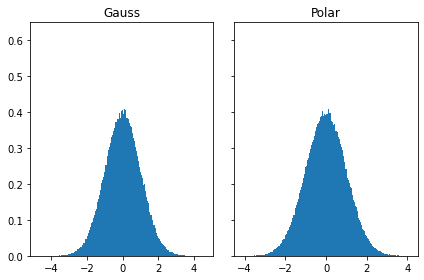

In [4]:
def run_method(n, f, *args):
    return [f(*args) for _ in range(n)]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')

axs[1].hist(run_method(N, polar, 0, 1), density=True, bins=bins)
axs[1].title.set_text('Polar')

plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

### Obliczyć eksperymentalne znaczenia dla wartości średniej oraz wariancji

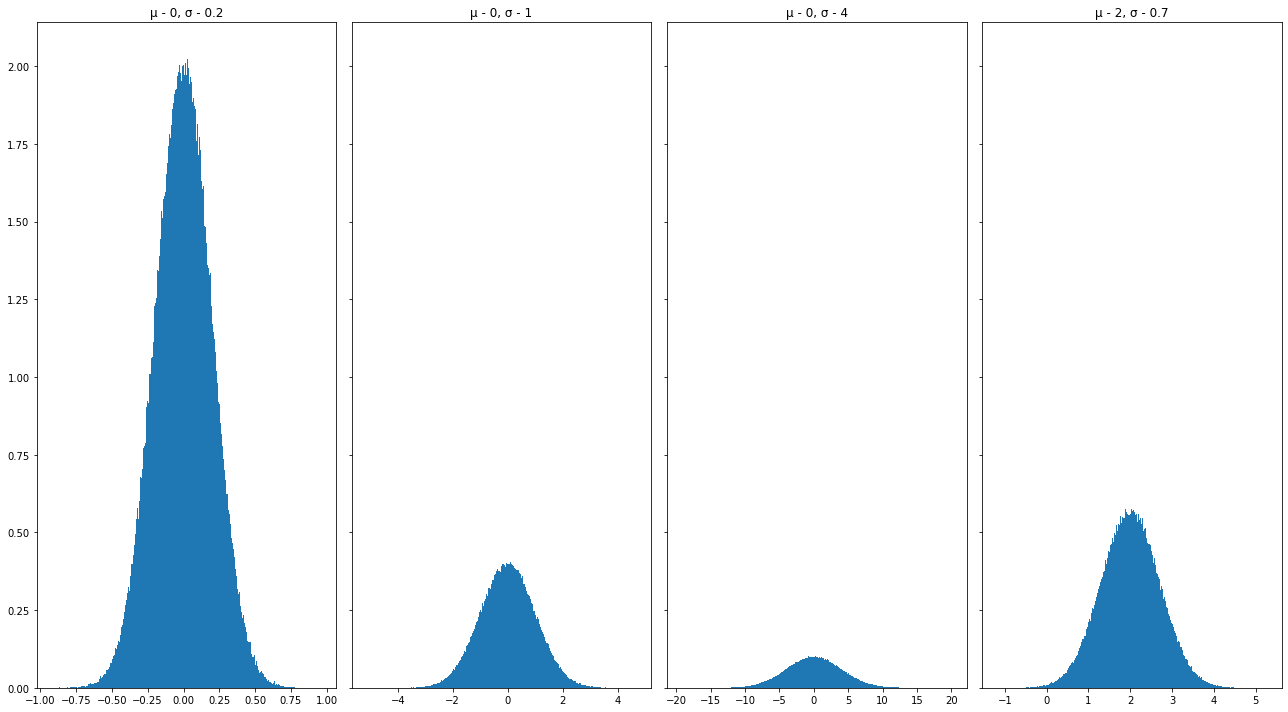

In [5]:
class Arg:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

def plot_polar_args(args: list):
    fig, axs = plt.subplots(1, len(args), sharey=True, tight_layout=True)
    fig.set_size_inches(18, 10, forward=True)
    
    for i, arg in enumerate(args):
        axs[i].hist(run_method(N, polar, arg.mu, arg.sigma), density=True, bins=bins)
        axs[i].title.set_text(f'μ - {arg.mu}, σ - {arg.sigma}')

    plt.show()
    
plot_polar_args([Arg(0, 0.2), Arg(0, 1), Arg(0, 4), Arg(2, 0.7)])

## Problem A2

### Implementacja generatora liczb losowych z rozkładu Cauchy'ego  $ C(y_0, \gamma)$, metodą odwróconej dystrybuanty

\begin{equation}
  f(y) = \dfrac{1}{ \pi \gamma [ 1 + ( \dfrac{y - y_0}{\gamma} )^2 ]}, y \in (-\infty, \infty)
\end{equation}


In [6]:
def cauchy(y = 0, scale = 1):
    return  1 / ( np.pi * scale * ( 1 + ( ( y - rand.uniform(-0.5, 0.5) ) / scale )**2 ) )

### Histogram i porównanie ze wzorem analitycznym dla różnych $ y_0, \gamma $

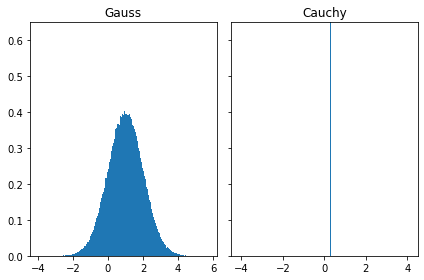

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(1 - np.random.normal(size=N), density=True, bins=bins)
axs[0].title.set_text('Gauss')

axs[1].hist(run_method(N, cauchy, 0, 1) , density=True, bins=bins)
axs[1].title.set_text('Cauchy')

plt.plot()
plt.xlim(-4.5, 4.5)
plt.ylim(0, 0.65)

plt.show()

## Problem B

### Ruina gracza dla 2 graczy A, B

In [8]:
def gamblers_ruin(a_balance, b_balance, prob, bet = 1):
    a_wins = []
    game_counter = 0
    
    while a_balance > 0 and b_balance > 0:
        p1_win = np.random.uniform(0, 1) < prob

        a_balance = a_balance + bet if p1_win else a_balance - bet

        b_balance = b_balance - bet if p1_win else b_balance + bet

        a_wins.append(p1_win)
        game_counter += 1
        
    return a_wins, game_counter

In [9]:
def print_stats(number_of_games, a_wins_sum, prob):
    print("Prawdopodobieństwo sukcesu w jednej rogrywce przez A: ", prob, "\n")
    print("Liczba rozgrywek wygranych przez A: ", a_wins_sum)
    print("Liczba rozgrywek wygranych przez B: ", number_of_games - a_wins_sum)
    print("Ułamek rozgrywek wygranych przez A: {:.2f}".format(a_wins_sum/number_of_games))
    print("Ułamek rozgrywek wygranych przez B: {:.2f}".format(1 - a_wins_sum/number_of_games))

In [10]:
def plot_ruin(number_of_games, a_wins):   
    plt.plot(range(number_of_games), np.cumsum(a_wins))
    
    plt.grid()
    plt.xlabel('Liczba rozgrywek')
    plt.ylabel('Liczba rozgrywek wygranych przez A')
    plt.ylim(0, number_of_games)
    plt.xlim(0, number_of_games)
    
    plt.show()

### Kapitały początkowe A,B:
$ a = 50; b = 50 $

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba rozgrywek wygranych przez A:  507
Liczba rozgrywek wygranych przez B:  457
Ułamek rozgrywek wygranych przez A: 0.53
Ułamek rozgrywek wygranych przez B: 0.47


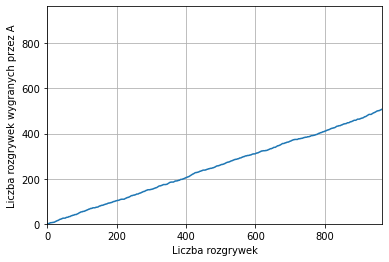

In [11]:
prob = 0.5
a_wins, number_of_games = gamblers_ruin(50, 50, prob, 1)

print_stats(number_of_games, sum(a_wins), prob)
plot_ruin(number_of_games, a_wins)

## Problem C

### Ruina gracza dla 2 graczy A, B

$ a + b = 100 $

### 1)

$ a = 20, b = 80 $

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba rozgrywek wygranych przez A:  16
Liczba rozgrywek wygranych przez B:  36
Ułamek rozgrywek wygranych przez A: 0.31
Ułamek rozgrywek wygranych przez B: 0.69


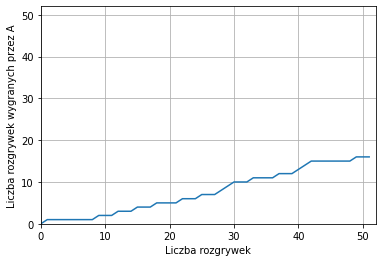

In [12]:
prob = 0.5

a_wins, number_of_games = gamblers_ruin(20, 80, prob, 1)

print_stats(number_of_games, sum(a_wins), prob)
plot_ruin(number_of_games, a_wins)

### 2)

$ a = 40, b = 60 $

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba rozgrywek wygranych przez A:  1977
Liczba rozgrywek wygranych przez B:  1917
Ułamek rozgrywek wygranych przez A: 0.51
Ułamek rozgrywek wygranych przez B: 0.49


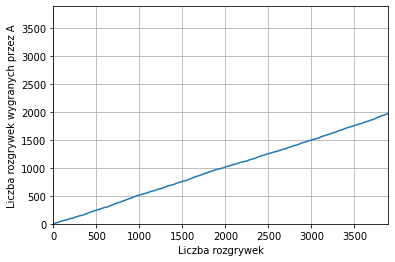

In [13]:
prob = 0.5

a_wins, number_of_games = gamblers_ruin(40, 60, prob)

print_stats(number_of_games, sum(a_wins), prob)
plot_ruin(number_of_games, a_wins)

### 3)

$ a = 70, b = 30 $

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba rozgrywek wygranych przez A:  282
Liczba rozgrywek wygranych przez B:  252
Ułamek rozgrywek wygranych przez A: 0.53
Ułamek rozgrywek wygranych przez B: 0.47


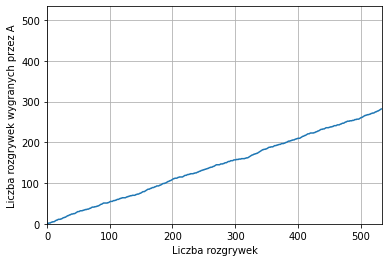

In [14]:
prob = 0.5

a_wins, number_of_games = gamblers_ruin(70, 30, prob)

print_stats(number_of_games, sum(a_wins), prob)
plot_ruin(number_of_games, a_wins)

## Problem D

### Liczba rozgrywek do ukończenia gry

\begin{equation}
  p_A = \dfrac{1}{2}, \dfrac{1}{5}, \dfrac{4}{5}; \, a = b = 50; \, liczba \, gier = 20000
\end{equation}

In [15]:
def gamblers_ruin_length(number_of_games, a_balance, b_balance, prob, bet = 1):
    a_wins = [False] * number_of_games
    game_counter = [0] * number_of_games
    
    for i in range(number_of_games):
        p1b = a_balance
        p2b = b_balance

        while p1b > 0 and p2b > 0:
            game_counter[i] += 1
            
            p1_win = np.random.uniform(0, 1) < prob

            p1b = p1b + bet if p1_win else p1b - bet

            p2b = p2b - bet if p1_win else p2b + bet
     
        a_wins[i] = p1b > 0
        
    return a_wins, game_counter

In [16]:
def print_stats_games(number_of_games, a_wins_sum, prob):
    print("Prawdopodobieństwo sukcesu w jednej rogrywce przez A: ", prob, "\n")
    print("Liczba gier wygranych przez A: ", a_wins_sum)
    print("Liczba gier wygranych przez B: ", number_of_games - a_wins_sum)
    print("Ułamek gier wygranych przez A: {:.2f}".format(a_wins_sum/number_of_games))
    print("Ułamek gier wygranych przez B: {:.2f}".format(1 - a_wins_sum/number_of_games))

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba gier wygranych przez A:  9987
Liczba gier wygranych przez B:  10013
Ułamek gier wygranych przez A: 0.50
Ułamek gier wygranych przez B: 0.50


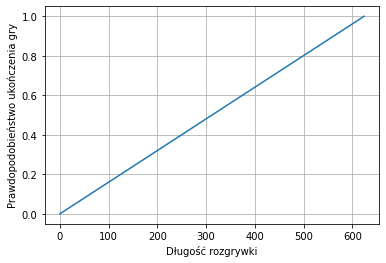

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.2 

Liczba gier wygranych przez A:  0
Liczba gier wygranych przez B:  20000
Ułamek gier wygranych przez A: 0.00
Ułamek gier wygranych przez B: 1.00


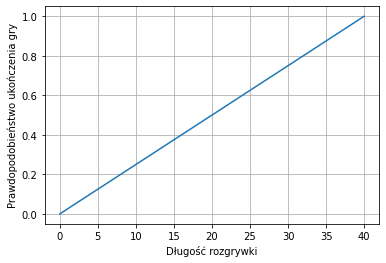

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.8 

Liczba gier wygranych przez A:  20000
Liczba gier wygranych przez B:  0
Ułamek gier wygranych przez A: 1.00
Ułamek gier wygranych przez B: 0.00


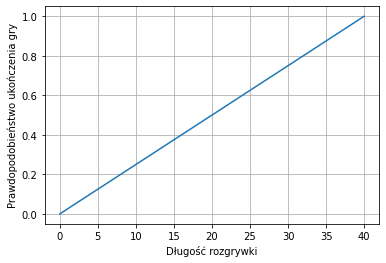

In [17]:
prob = (0.5, 0.2, 0.8)
number_of_games = 20000

for i in prob:
    a_wins, game_counter = gamblers_ruin_length(number_of_games, 50, 50, i, 2)

    average_game_len = sum(game_counter)/len(game_counter)
    x = range(int(average_game_len))
    
    print_stats_games(number_of_games, sum(a_wins), i)
    plt.plot(x, np.linspace(0, 1, int(average_game_len)))

    plt.grid()
    plt.xlabel('Długość rozgrywki')
    plt.ylabel('Prawdopodobieństwo ukończenia gry')

    plt.show()

### Średnia długość rozgrywki

In [18]:
def plot_ruin_games(number_of_games, a_wins):   
    plt.plot(range(number_of_games), np.cumsum(a_wins))
    
    plt.grid()
    plt.xlabel('Liczba gier')
    plt.ylabel('Liczba gier wygranych przez A')
    plt.ylim(0, number_of_games)
    plt.xlim(0, number_of_games)
    
    plt.show()

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba gier wygranych przez A:  10032
Liczba gier wygranych przez B:  9968
Ułamek gier wygranych przez A: 0.50
Ułamek gier wygranych przez B: 0.50
Średnia liczba rozgrywek do ukończenia gry:  625.88


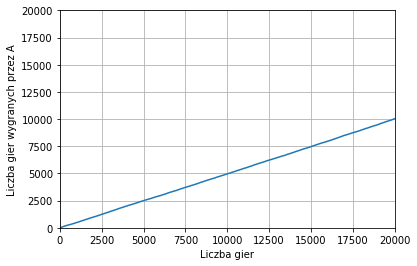

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.2 

Liczba gier wygranych przez A:  0
Liczba gier wygranych przez B:  20000
Ułamek gier wygranych przez A: 0.00
Ułamek gier wygranych przez B: 1.00
Średnia liczba rozgrywek do ukończenia gry:  41.5128


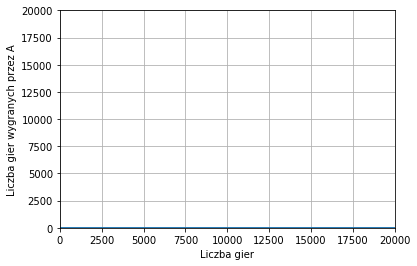

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.8 

Liczba gier wygranych przez A:  20000
Liczba gier wygranych przez B:  0
Ułamek gier wygranych przez A: 1.00
Ułamek gier wygranych przez B: 0.00
Średnia liczba rozgrywek do ukończenia gry:  41.4456


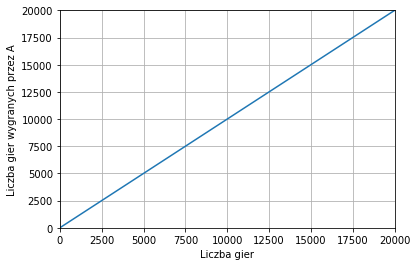

In [19]:
number_of_games = 20000

prob = (0.5, 0.2, 0.8)

for i in prob:
    a_wins, game_counter = gamblers_ruin_length(number_of_games, 50, 50, i, 2)

    print_stats_games(number_of_games, sum(a_wins), i)
    print("Średnia liczba rozgrywek do ukończenia gry: ", sum(game_counter)/number_of_games)
    plot_ruin_games(number_of_games, a_wins)

## Problem G

### Trajektoria liczby wygranych gier dla 1 z 2 graczy 

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba gier wygranych przez A:  6
Liczba gier wygranych przez B:  4
Ułamek gier wygranych przez A: 0.60
Ułamek gier wygranych przez B: 0.40


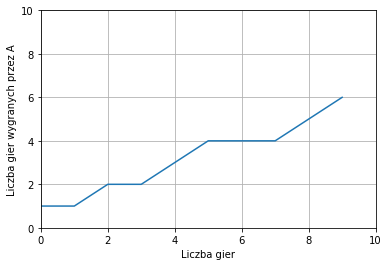

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.2 

Liczba gier wygranych przez A:  0
Liczba gier wygranych przez B:  10
Ułamek gier wygranych przez A: 0.00
Ułamek gier wygranych przez B: 1.00


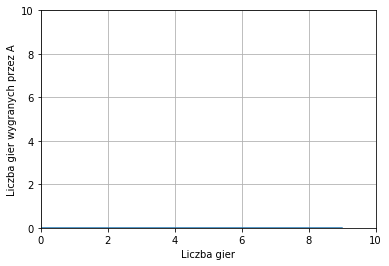

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.8 

Liczba gier wygranych przez A:  10
Liczba gier wygranych przez B:  0
Ułamek gier wygranych przez A: 1.00
Ułamek gier wygranych przez B: 0.00


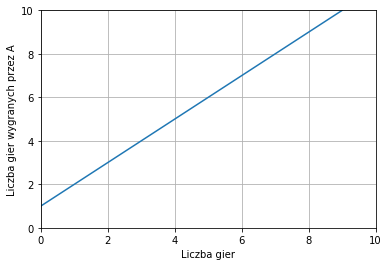

In [20]:
number_of_games = 10

prob = (0.5, 0.2, 0.8)

for i in prob:
    a_wins, game_counter = gamblers_ruin_length(number_of_games, 50, 50, i, 2)

    print_stats_games(number_of_games, sum(a_wins), i)
    plot_ruin_games(number_of_games, a_wins)

### Trajektoria kapitału dla 1 z 2 graczy 

In [21]:
def gamblers_ruin_balance(a_balance, b_balance, prob, bet = 1):
    game_counter = 0
    a_wins = []
    a_b = []
    
    while a_balance > 0 and b_balance > 0:
        p1_win = np.random.uniform(0, 1) < prob

        a_balance = a_balance + bet if p1_win else a_balance - bet

        b_balance = b_balance - bet if p1_win else b_balance + bet
        
        a_wins.append(p1_win)
        a_b.append(a_balance)
        game_counter += 1
        
    return a_wins,game_counter,a_b

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.5 

Liczba rozgrywek wygranych przez A:  451
Liczba rozgrywek wygranych przez B:  501
Ułamek rozgrywek wygranych przez A: 0.47
Ułamek rozgrywek wygranych przez B: 0.53


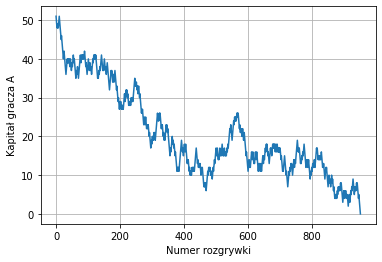

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.2 

Liczba rozgrywek wygranych przez A:  10
Liczba rozgrywek wygranych przez B:  60
Ułamek rozgrywek wygranych przez A: 0.14
Ułamek rozgrywek wygranych przez B: 0.86


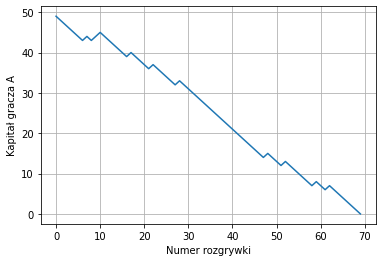

Prawdopodobieństwo sukcesu w jednej rogrywce przez A:  0.8 

Liczba rozgrywek wygranych przez A:  57
Liczba rozgrywek wygranych przez B:  7
Ułamek rozgrywek wygranych przez A: 0.89
Ułamek rozgrywek wygranych przez B: 0.11


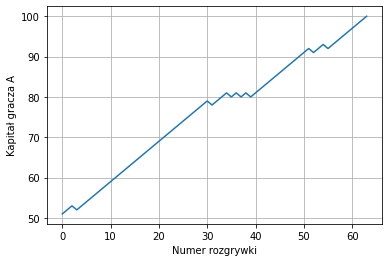

In [22]:
prob = (0.5, 0.2, 0.8)

for i in prob:
    a_wins, number_of_games, a_balances = gamblers_ruin_balance(50, 50, i)
    plt.plot(range(number_of_games), a_balances)
    
    print_stats(number_of_games, sum(a_wins), i)    
    plt.grid()
    plt.xlabel('Numer rozgrywki')
    plt.ylabel('Kapitał gracza A')
    
    plt.show()